## **Problem Definition**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import tensorflow as tf
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For high-level visualization with Plotly
import plotly.graph_objects as go  # For low-level customization with Plotly
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import lightgbm as lgb
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Dataset**

In [3]:
df = pd.read_excel('/content/drive/MyDrive/creditcard.xlsx')

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/Credit card folder/creditcard_Test_1_2023.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Credit card folder/creditcard_test_data_2.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Credit card folder/Creditcard_test_data_3.csv')

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
df2.head(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [7]:
df3.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
df.describe

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 284807 rows and 31 columns.


In [10]:
df.ndim

2

In [11]:
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Display summary statistics
print(df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **Univariate Analysis**

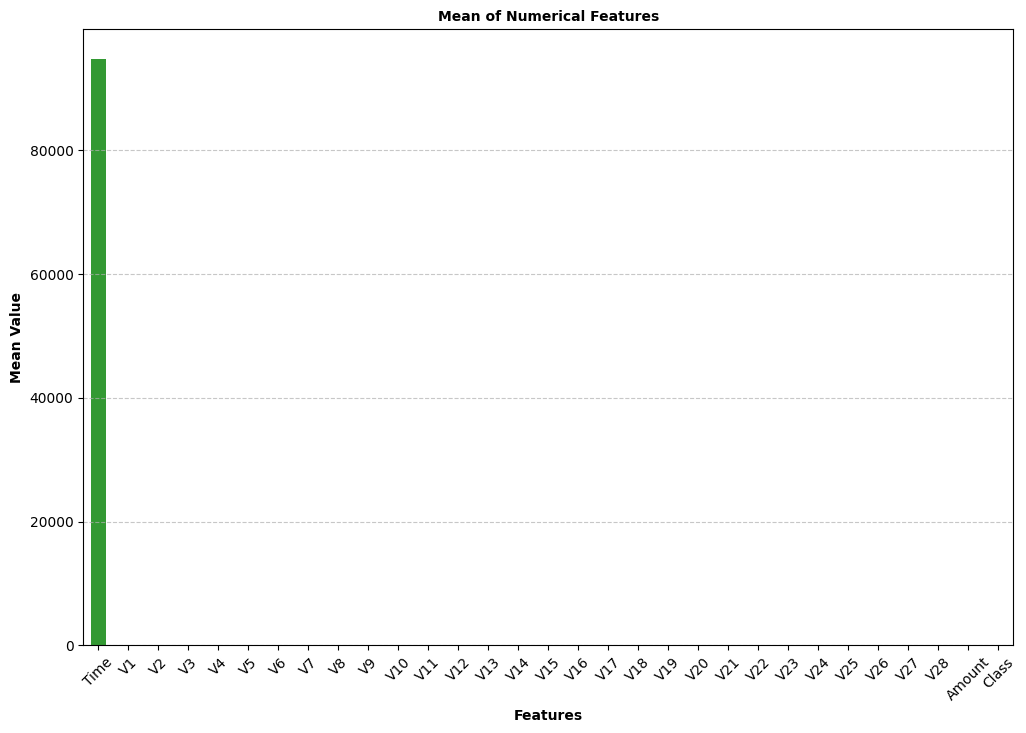

In [12]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the mean of each numerical column
numerical_means = df[numerical_cols].mean()

# Create a bar plot
plt.figure(figsize=(12, 8))
numerical_means.plot(kind='bar', color='green', alpha=0.8)
plt.title("Mean of Numerical Features", fontsize=10, fontweight='bold')
plt.ylabel("Mean Value", fontsize=10, fontweight='bold')
plt.xlabel("Features", fontsize=10, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Categorical Features:

In [13]:
# Count plots for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], palette='viridis')
    plt.title(f"Count Plot of {col}")
    plt.show(10)


# **Bivariate Analysis**

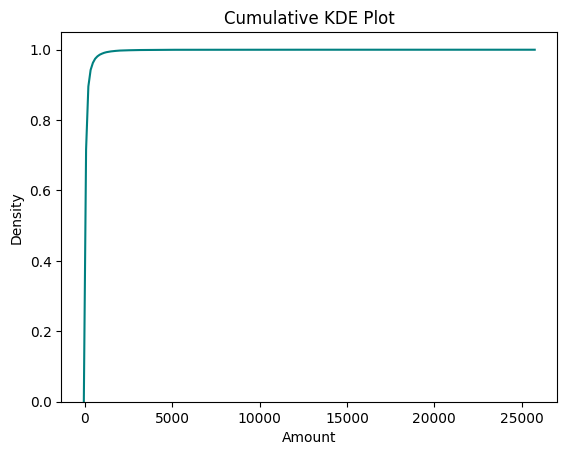

In [14]:
sns.kdeplot(df['Amount'], cumulative=True, color='teal')
plt.title("Cumulative KDE Plot")
plt.show()

In [15]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

,count
Class,
0,284315
1,492


<Figure size 1500x1000 with 0 Axes>

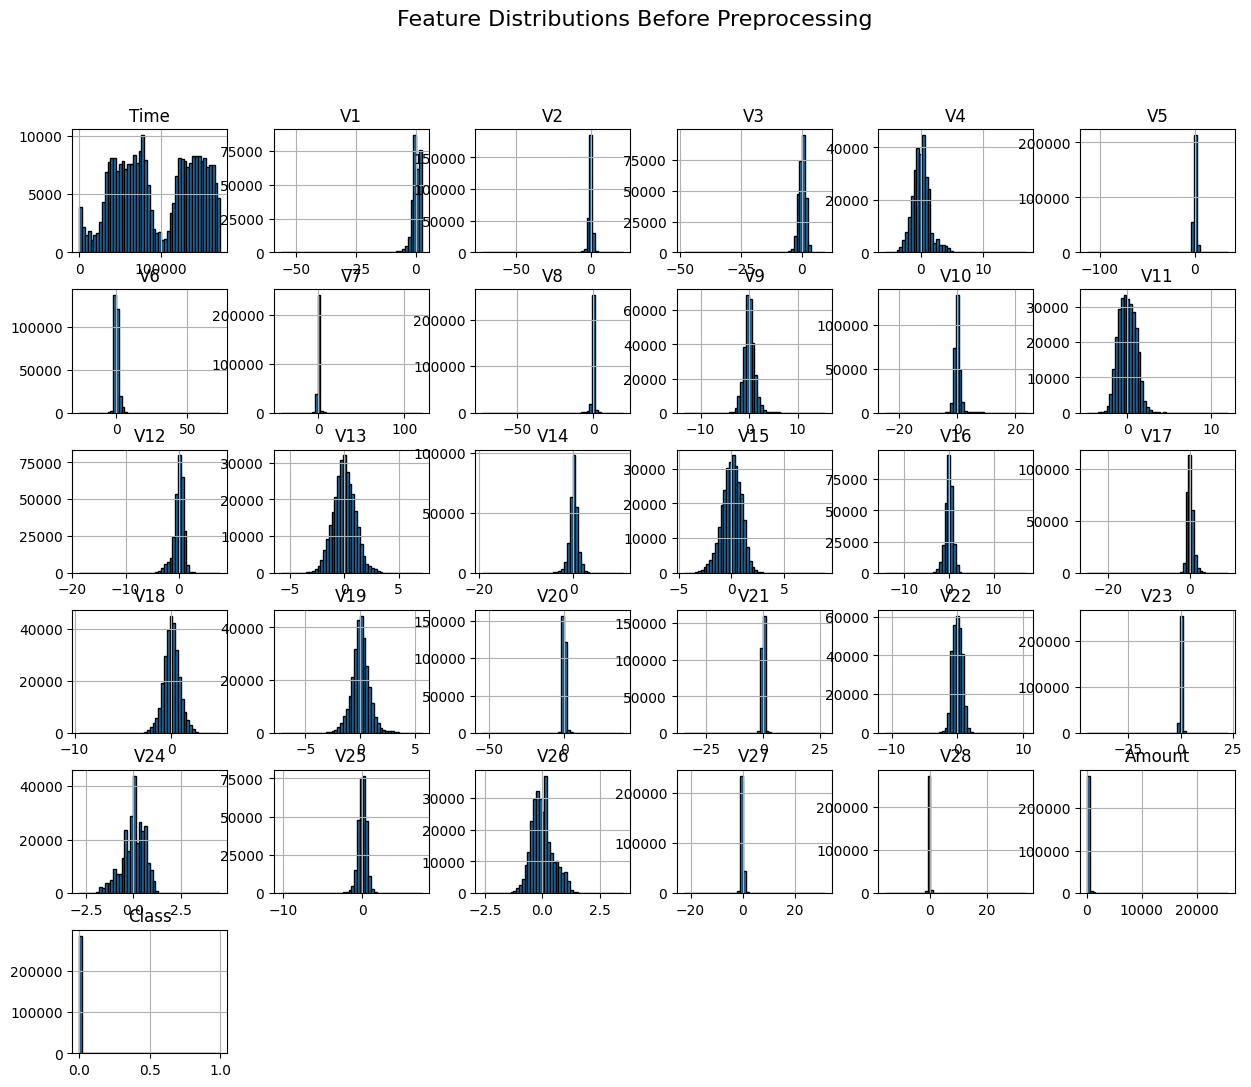

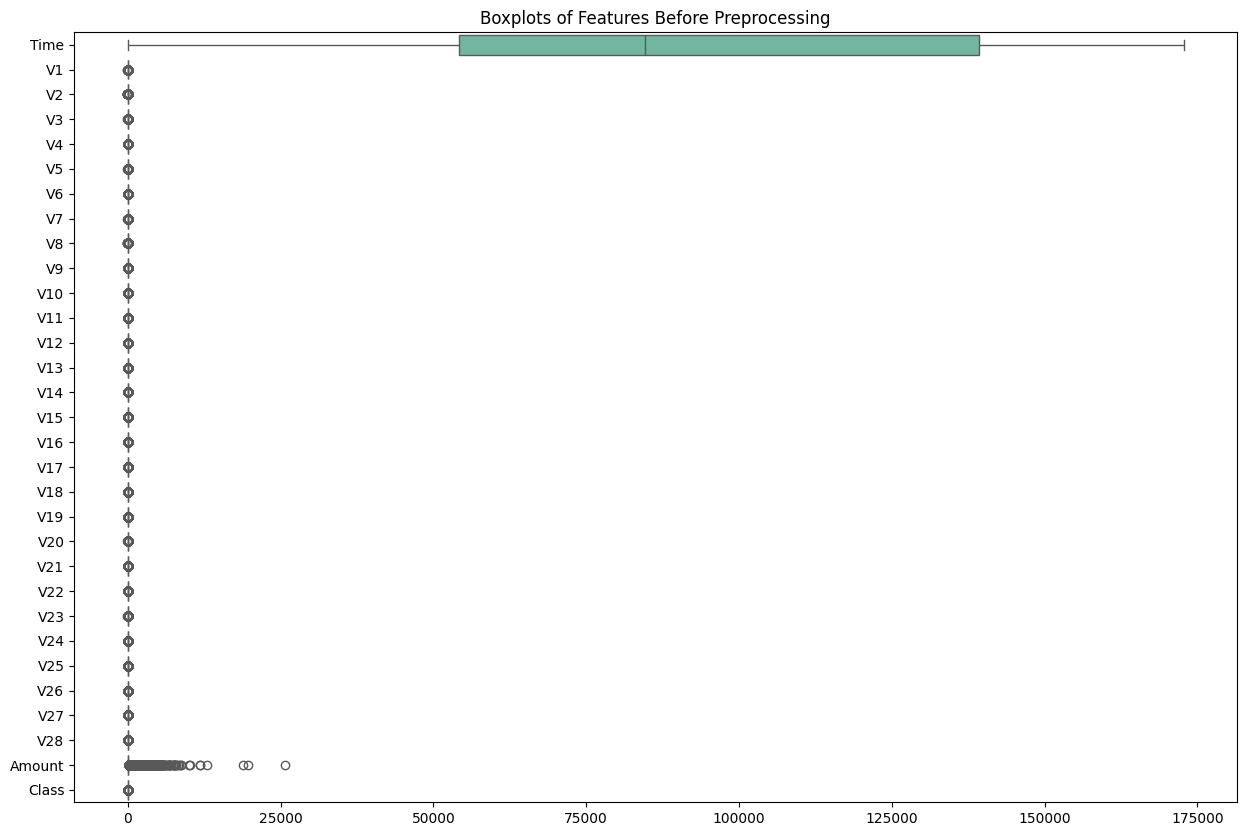

Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.205498e-16 -2.406306e-15   
std    1.380247e+00  1

In [16]:
# Set up figure size
plt.figure(figsize=(15, 10))

# Plot histograms for numerical columns
df.hist(figsize=(15, 12), bins=50, edgecolor='black')
plt.suptitle("Feature Distributions Before Preprocessing", fontsize=16)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Features Before Preprocessing", fontsize=12)
plt.show()

# Display summary statistics
print("Summary Statistics:")
print(df.describe())

# **Data Preprocessing and feature Engineering For Pelican Algorithm**

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume `df` is your DataFrame and "Class" is the label column:
features = df.drop(columns=["Class"])
labels   = df["Class"]

# 1a. Scale features
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 1b. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

In [18]:
from sklearn.base import clone
from sklearn.metrics import roc_auc_score


class PelicanOptimizer:
    def __init__(self, estimator, param_bounds, pop_size=20, n_iter=50, seed=42):
        """
        estimator     : a scikit-learn classifier
        param_bounds  : dict, e.g. {'max_depth': (1, 20), 'min_samples_split': (2, 100)}
        pop_size      : number of pelicans in the swarm
        n_iter        : number of optimization iterations
        """
        self.estimator    = estimator
        self.param_bounds = param_bounds
        self.pop_size     = pop_size
        self.n_iter       = n_iter
        self.history      = []  # best fitness per iteration
        np.random.seed(seed)

    def _random_solution(self):
        sol = {}
        for k, (low, high) in self.param_bounds.items():
            sol[k] = np.random.uniform(low, high)
        return sol

    def _evaluate(self, sol, X, y):
        clf = clone(self.estimator)
        # round or cast integer params
        params = {k: int(round(v)) for k, v in sol.items()}
        clf.set_params(**params)
        # simple 3-fold CV AUC
        scores = []
        idx = np.arange(len(y))
        np.random.shuffle(idx)
        splits = np.array_split(idx, 3)
        for fold in range(3):
            val_idx = splits[fold]
            train_idx = np.concatenate([splits[i] for i in range(3) if i!=fold])
            clf.fit(X[train_idx], y.iloc[train_idx])
            proba = clf.predict_proba(X[val_idx])[:,1]
            scores.append(roc_auc_score(y.iloc[val_idx], proba))
        return np.mean(scores)

    def optimize(self, X, y):
        # 1.1 Initialize population
        pop = [self._random_solution() for _ in range(self.pop_size)]
        fitness = [self._evaluate(sol, X, y) for sol in pop]
        best_idx = np.argmax(fitness)
        best_sol, best_fit = pop[best_idx], fitness[best_idx]

        # 1.2 Iterations
        for t in range(self.n_iter):
            new_pop = []
            for i, sol in enumerate(pop):
                # Move towards best + random Gaussian perturbation
                direction = {k: best_sol[k] - sol[k] for k in sol}
                step = {k: sol[k] + np.random.rand() * direction[k]
                              + np.random.randn()*0.1*(self.param_bounds[k][1]-self.param_bounds[k][0])
                        for k in sol}
                # Clip to bounds
                for k,(low,high) in self.param_bounds.items():
                    step[k] = np.clip(step[k], low, high)
                new_pop.append(step)

            # 1.3 Re-evaluate
            pop = new_pop
            fitness = [self._evaluate(sol, X, y) for sol in pop]
            # Update global best
            idx = np.argmax(fitness)
            if fitness[idx] > best_fit:
                best_fit, best_sol = fitness[idx], pop[idx]
            self.history.append(best_fit)

        return best_sol, best_fit


In [20]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, r2_score
)

# 0) best_sol is the dict you found, e.g. {'max_depth':7,'min_samples_split':84}
clf_best = DecisionTreeClassifier(**best_sol, random_state=42)

# 1) Fit on full training data
clf_best.fit(X_train, y_train)

# 2) Test inputs
X_te = X_test    # scaled/encoded test features
y_te = y_test         # ground-truth labels

# 3) Get predictions and probabilities
y_pred  = clf_best.predict(X_te)
y_proba = clf_best.predict_proba(X_te)[:, 1]

# 4) Compute metrics
acc     = accuracy_score(y_te, y_pred)
prec    = precision_score(y_te, y_pred)
rec     = recall_score(y_te, y_pred)
f1      = f1_score(y_te, y_pred)
roc_auc = roc_auc_score(y_te, y_proba)
r2      = r2_score(y_te, y_proba)

# 5) Display
print("Test set results:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1 Score : {f1:.4f}")
print(f"  ROC AUC  : {roc_auc:.4f}")
print(f"  R² (proba): {r2:.4f}")


Test set results:
  Accuracy : 0.9994
  Precision: 0.8795
  Recall   : 0.7449
  F1 Score : 0.8066
  ROC AUC  : 0.8840
  R² (proba): 0.6660


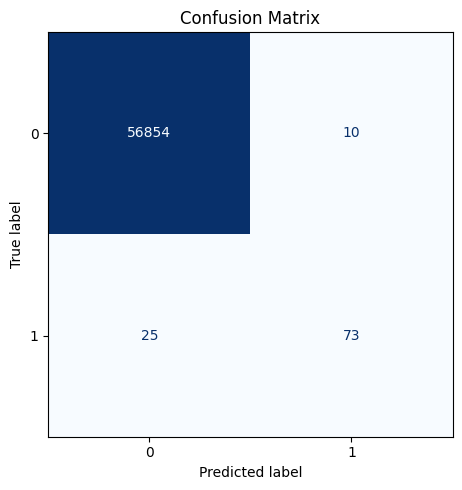

In [21]:
# Cell 2: Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# compute confusion matrix
cm = confusion_matrix(y_te, y_pred, labels=[0, 1])

# plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
fig_cm, ax_cm = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax_cm, cmap="Blues", colorbar=False)
ax_cm.set_title("Confusion Matrix")
ax_cm.set_xlabel("Predicted label")
ax_cm.set_ylabel("True label")
plt.tight_layout()
plt.show()


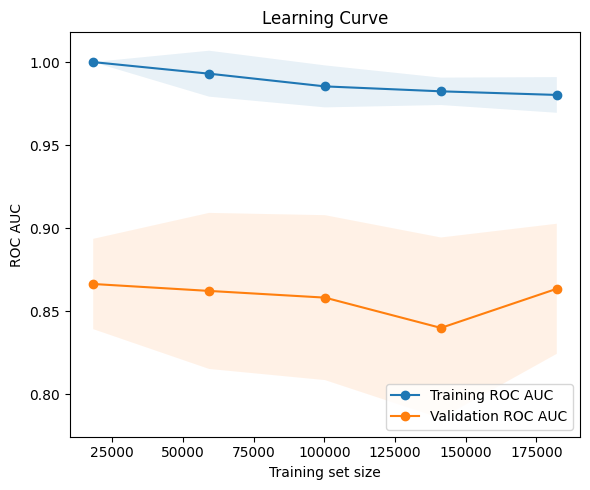

In [22]:
# Cell 3: Learning Curve Visualization
from sklearn.model_selection import learning_curve

# generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=clf_best,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="roc_auc",
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42,
    n_jobs=-1
)

# calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# plot
fig_lc, ax_lc = plt.subplots(figsize=(6, 5))
ax_lc.plot(train_sizes, train_mean, marker='o', label="Training ROC AUC")
ax_lc.fill_between(train_sizes,
                   train_mean - train_std,
                   train_mean + train_std,
                   alpha=0.1)
ax_lc.plot(train_sizes, val_mean, marker='o', label="Validation ROC AUC")
ax_lc.fill_between(train_sizes,
                   val_mean - val_std,
                   val_mean + val_std,
                   alpha=0.1)
ax_lc.set_xlabel("Training set size")
ax_lc.set_ylabel("ROC AUC")
ax_lc.set_title("Learning Curve")
ax_lc.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [23]:
# Cell X: Save your trained model
import joblib

# Save to file
joblib.dump(clf_best, 'pelican clf_best.joblib')
print("Pelican Model saved to clf_best.joblib")

# — later, in a new session or script —

# Cell Y: Load the model back
import joblib

clf_loaded = joblib.load('pelican clf_best.joblib')
print("Pelican Model loaded; ready to predict:")
print(clf_loaded)


Pelican Model saved to clf_best.joblib
Pelican Model loaded; ready to predict:
DecisionTreeClassifier(max_depth=13, min_samples_split=14, random_state=42)


# **Exploratory Data Analysis on Data Two**

In [24]:
df2.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [25]:
df2.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [26]:
df2.shape

(568630, 31)

In [27]:
# Understanding the Data.

def column_summary(df2):
    # Return a new DataFrame with summarized information about the columns of 'df'.
    return pd.DataFrame({
        'Data Type': df2.dtypes,  # Retrieve the data type of each column (e.g., int64, object).
        'Missing Values': df2.isnull().sum(),  # Count the number of missing
        'Unique Values': df2.nunique(),  # Count the number of unique values in each column.
        'Memory Usage (bytes)': df2.memory_usage(index=False)  # Calculate memory usage for each column (excluding the index).
    })
# print the resulting DataFrame.
print(column_summary(df2))


       Data Type  Missing Values  Unique Values  Memory Usage (bytes)
id         int64               0         568630               4549040
V1       float64               0         552035               4549040
V2       float64               0         552035               4549040
V3       float64               0         552035               4549040
V4       float64               0         552035               4549040
V5       float64               0         552035               4549040
V6       float64               0         552035               4549040
V7       float64               0         552035               4549040
V8       float64               0         552035               4549040
V9       float64               0         552035               4549040
V10      float64               0         552035               4549040
V11      float64               0         552035               4549040
V12      float64               0         552035               4549040
V13      float64    

There are no missing Values in Data two

# **Testing Pelican Model with The Second Dataset**

In [28]:
import joblib
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    r2_score,
    confusion_matrix
)

# 1. Load the saved base model (uncalibrated)
base_model = joblib.load('/content/drive/MyDrive/Credit card folder/pelican clf_best.joblib')  # ← replace with your filepath

# 2. Split the dataset
y_2 = df2['Class']                               # ← replace 'target' with your label column
X_2 = df2.drop(columns=['Class'])

# 3. Split new data into a calibration set and a test set
#    We hold out half the data for calibration and half for evaluation
X_cal, X_test, y_cal, y_test = train_test_split(
    X_2, y_2,
    test_size=0.5,
    random_state=42,
    stratify=y_2
)


In [29]:
from sklearn.calibration import CalibratedClassifierCV

# 4. Calibrate the base model using sigmoid
calibrator = CalibratedClassifierCV(
    estimator=base_model,   # ← use “estimator” instead of “base_estimator”
    method='sigmoid',
    cv=5
)
calibrator.fit(X_cal, y_cal)


CalibratedClassifierCV(cv=5,
                       estimator=DecisionTreeClassifier(max_depth=20,
                                                        min_samples_split=76,
                                                        random_state=42))

In [30]:
# 5. Generate predictions on the held-out test set
y_pred2     = calibrator.predict(X_test)
y_proba2    = calibrator.predict_proba(X_test)[:, 1]

# 6. Compute evaluation metrics using calibrated probabilities
acc     = accuracy_score(y_test, y_pred2)
prec    = precision_score(y_test, y_pred2, zero_division=0)
rec     = recall_score(y_test, y_pred2, zero_division=0)
f1      = f1_score(y_test, y_pred2, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba2)
r2      = r2_score(y_test, y_proba2)

print("Calibrated results on new data:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1 Score : {f1:.4f}")
print(f"  ROC AUC  : {roc_auc:.4f}")
print(f"  R² (proba): {r2:.4f}")

cm = confusion_matrix(y_test, y_pred2)
print("\nConfusion Matrix:")
print(cm)

Calibrated results on new data:
  Accuracy : 0.9997
  Precision: 0.9997
  Recall   : 0.9996
  F1 Score : 0.9997
  ROC AUC  : 0.9999
  R² (proba): 0.9987

Confusion Matrix:
[[142121     37]
 [    61 142096]]


<Figure size 600x600 with 0 Axes>

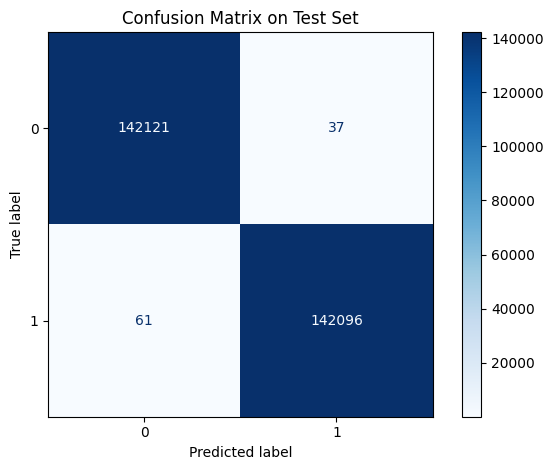

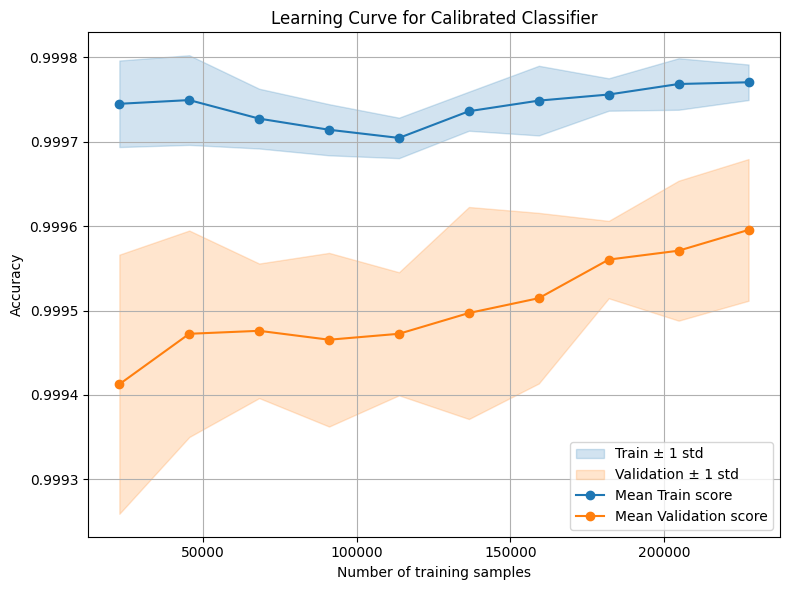

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay

# 1) Plot the confusion matrix
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix on Test Set")
plt.tight_layout()
plt.show()

# 2) Plot a learning curve for the calibrated model using X_cal, y_cal
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=calibrator,
    X=X_cal,
    y=y_cal,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores,  axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores,  axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2,
    color='tab:blue',
    label='Train ± 1 std'
)
plt.fill_between(
    train_sizes,
    valid_mean - valid_std,
    valid_mean + valid_std,
    alpha=0.2,
    color='tab:orange',
    label='Validation ± 1 std'
)
plt.plot(
    train_sizes,
    train_mean,
    'o-',
    color='tab:blue',
    label='Mean Train score'
)
plt.plot(
    train_sizes,
    valid_mean,
    'o-',
    color='tab:orange',
    label='Mean Validation score'
)

plt.title("Learning Curve for Calibrated Classifier")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Exploratory Data Analysis on Data Three**

In [32]:
df3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
df3.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
df3.shape

(284807, 31)

In [35]:
# Understanding the Data.

def column_summary(df3):
    # Return a new DataFrame with summarized information about the columns of 'df'.
    return pd.DataFrame({
        'Data Type': df3.dtypes,  # Retrieve the data type of each column (e.g., int64, object).
        'Missing Values': df3.isnull().sum(),  # Count the number of missing
        'Unique Values': df3.nunique(),  # Count the number of unique values in each column.
        'Memory Usage (bytes)': df3.memory_usage(index=False)  # Calculate memory usage for each column (excluding the index).
    })
# print the resulting DataFrame.
print(column_summary(df3))


       Data Type  Missing Values  Unique Values  Memory Usage (bytes)
Time     float64               0         124592               2278456
V1       float64               0         275663               2278456
V2       float64               0         275663               2278456
V3       float64               0         275663               2278456
V4       float64               0         275663               2278456
V5       float64               0         275663               2278456
V6       float64               0         275663               2278456
V7       float64               0         275663               2278456
V8       float64               0         275663               2278456
V9       float64               0         275663               2278456
V10      float64               0         275663               2278456
V11      float64               0         275663               2278456
V12      float64               0         275663               2278456
V13      float64    

# **Testing Pelican Model With Third Dataset**

In [36]:
import joblib

# 1. Load the saved base model (uncalibrated)
base_model = joblib.load('/content/drive/MyDrive/Credit card folder/pelican clf_best.joblib')  # ← replace with your filepath

# 2. Split the dataset
y_3 = df3['Class']
X_3 = df3.drop(columns=['Class'])


In [37]:
X_3.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [38]:
import pandas as pd
import joblib
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    r2_score,
    confusion_matrix
)

# Load trained model (or calibrator)
model = joblib.load('/content/drive/MyDrive/Credit card folder/pelican clf_best.joblib')

# Split df_3 into X_3 (features) and y_3 (labels)
y_3 = df3['Class']            # ← replace 'target' if your label column is named differently
X_3 = df3.drop(columns=['Class'])

# Drop any columns that were not used during training (e.g., 'id')
X_3 = X_3.drop(columns=['id'], errors='ignore')

# Because model was a CalibratedClassifierCV, it knows its training‐time feature names:
if hasattr(model, 'feature_names_in_'):
    expected_cols = list(model.feature_names_in_)
    #  Drop unexpected columns
    to_drop = [c for c in X_3.columns if c not in expected_cols]
    X_3 = X_3.drop(columns=to_drop, errors='ignore')

    # Add any missing columns (fill with zeros if truly missing)
    missing = [c for c in expected_cols if c not in X_3.columns]
    for c in missing:
        X_3[c] = 0

    # Reorder to match training order
    X_3 = X_3[expected_cols]

# Generate predictions
y_pred3  = model.predict(X_3)

# If predict_proba exists, get probabilities for AUC and R² on proba
try:
    y_proba3 = model.predict_proba(X_3)[:, 1]
    has_proba = True
except AttributeError:
    has_proba = False

# Compute metrics
acc     = accuracy_score(y_3, y_pred3)
prec    = precision_score(y_3, y_pred3, zero_division=0)
rec     = recall_score(y_3, y_pred3, zero_division=0)
f1      = f1_score(y_3, y_pred3, zero_division=0)

print("Test results on df3:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1 Score : {f1:.4f}")

if has_proba:
    roc_auc = roc_auc_score(y_3, y_proba3)
    r2      = r2_score(y_3, y_proba3)
    print(f"  ROC AUC  : {roc_auc:.4f}")
    print(f"  R² (proba): {r2:.4f}")
else:
    r2 = r2_score(y_3, y_pred3)
    print(f"  R²       : {r2:.4f}")

# 9. Display confusion matrix
cm = confusion_matrix(y_3, y_pred3)
print("\nConfusion Matrix:")
print(cm)


Test results on df3:
  Accuracy : 0.9970
  Precision: 0.3355
  Recall   : 0.7276
  F1 Score : 0.4593
  ROC AUC  : 0.8393
  R² (proba): -0.7387

Confusion Matrix:
[[283606    709]
 [   134    358]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


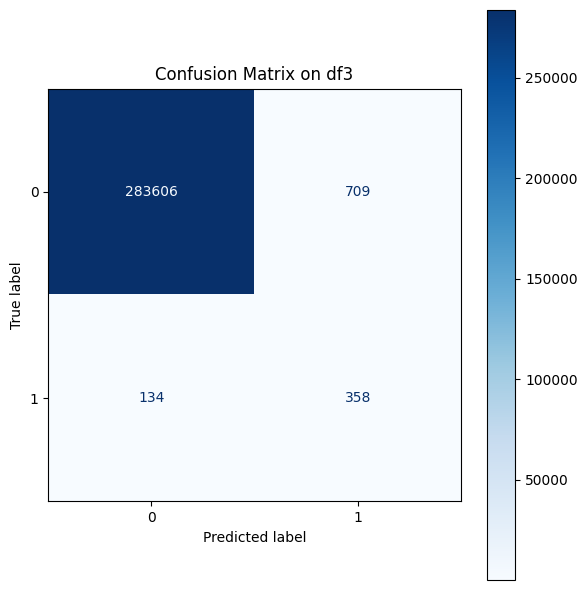

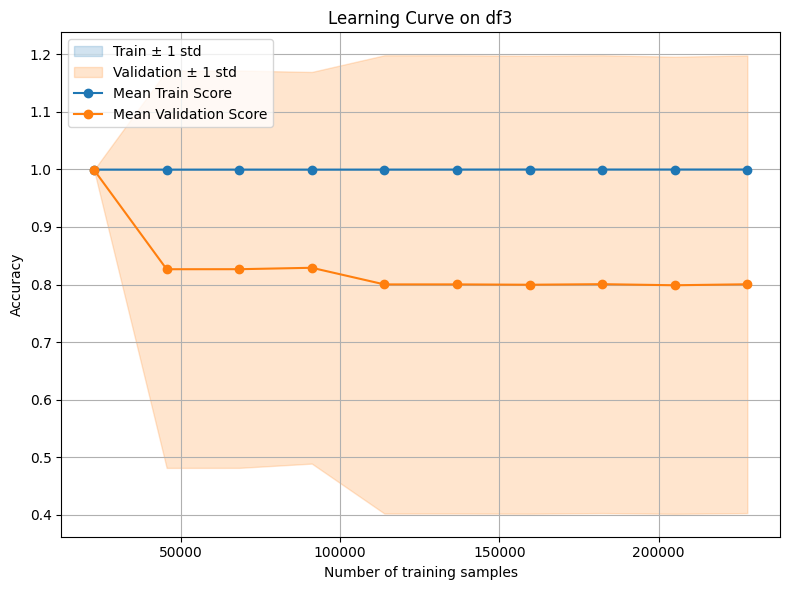

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

# — ASSUMPTIONS —
# • df3 is a pandas DataFrame in the environment, containing all feature columns plus a 'target' column.
# • If df3 has columns like 'id' that were not used at training time, they should be removed.

# 1. Split df3 into X3 (features) and y3 (labels)
y3 = df3['Class']
X3 = df3.drop(columns=['Class'], errors='ignore')

# 2. Drop any columns not used during training (e.g., 'id')
X3 = X3.drop(columns=['id'], errors='ignore')

# 3. If model has feature_names_in_, align X3 to those expected features:
if hasattr(model, 'feature_names_in_'):
    expected = list(model.feature_names_in_)
    # 3a. Drop any unexpected columns
    drop_cols = [col for col in X3.columns if col not in expected]
    X3 = X3.drop(columns=drop_cols, errors='ignore')
    # 3b. Add any missing columns with zeros
    missing_cols = [col for col in expected if col not in X3.columns]
    for col in missing_cols:
        X3[col] = 0
    # 3c. Reorder to match the training order
    X3 = X3[expected]

# 4. Generate predictions on X3
y_pred3 = model.predict(X3)

# 5. Compute confusion matrix
cm = confusion_matrix(y3, y_pred3)

# 6. Plot the confusion matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Confusion Matrix on df3")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# 7. Plot the learning curve for model using df3 as both training and validation data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X3,
    y=y3,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2,
    color='tab:blue',
    label='Train ± 1 std'
)
plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.2,
    color='tab:orange',
    label='Validation ± 1 std'
)
plt.plot(train_sizes, train_mean, 'o-', color='tab:blue', label='Mean Train Score')
plt.plot(train_sizes, val_mean, 'o-', color='tab:orange', label='Mean Validation Score')

plt.title("Learning Curve on df3")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Exploratory Data Analysis on Data Four**

In [40]:
df4.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [41]:
df4.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [42]:
df4.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [43]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


X_train_proc = preprocessor.fit_transform(X_train)    # scipy.sparse CSR
X_test_proc  = preprocessor.transform(X_test)
